# 数据探索

In [56]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.nonparametric.smoothers_lowess import lowess
%config InlineBackend.figure_format = 'svg'
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["figure.dpi"] = 100

In [29]:
data_path="../data/train.csv"
data=pd.read_csv(data_path)
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [30]:
survived_data=data[(data['Survived']==1)][['Name','Age','Cabin','Embarked','Pclass']]
print(f"生还比例: {len(survived_data)/len(data):.2%}")
survived_data.tail(15)

生还比例: 38.38%


,Name,Age,Cabin,Embarked,Pclass
855,"Aks, Mrs. Sam (Leah Rosen)",18.0,NaN,S,3
856,"Wick, Mrs. George Dennick (Mary Hitchcock)",45.0,NaN,S,1
857,"Daly, Mr. Peter Denis",51.0,E17,S,1
858,"Baclini, Mrs. Solomon (Latifa Qurban)",24.0,NaN,C,3
862,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",48.0,D17,S,1
865,"Bystrom, Mrs. (Karolina)",42.0,NaN,S,2
866,"Duran y More, Miss. Asuncion",27.0,NaN,C,2
869,"Johnson, Master. Harold Theodor",4.0,NaN,S,3
871,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",47.0,D35,S,1
874,"Abelson, Mrs. Samuel (Hannah Wizosky)",28.0,NaN,C,2


## 1、尝试从性别分析

In [31]:
male_data=data[data['Sex']=='male']
female_data=data[data['Sex']=='female']
male_survived_rate=len(male_data[male_data['Survived']==1])/len(male_data)
female_survived_rate=len(female_data[female_data['Survived']==1])/len(female_data)
print("男性：",male_survived_rate,'\n')
print("女性：",female_survived_rate)


男性： 0.18890814558058924 

女性： 0.7420382165605095


结论：女性生存率远高于男性，因此性别是重要特征

## 2、从登船地分析

In [32]:
in_C= data[data['Embarked']=='C']
in_Q= data[data['Embarked']=='Q']
in_S= data[data['Embarked']=='S']
C_survived_rate=len(in_C[in_C['Survived']==1])/len(in_C)
Q_survived_rate=len(in_Q[in_Q['Survived']==1])/len(in_Q)
S_survived_rate=len(in_S[in_S['Survived']==1])/len(in_S)
print("C登船生存率：",C_survived_rate)
print("Q登船生存率：",Q_survived_rate)  
print("S登船生存率：",S_survived_rate)

C登船生存率： 0.5535714285714286
Q登船生存率： 0.38961038961038963
S登船生存率： 0.33695652173913043


结论：c点生存率显著偏高，而q点略高于s点，差别不大。可以作为特征，使用目标编码。

## 3、从船票价格分析

### 3.1、船票价格分布

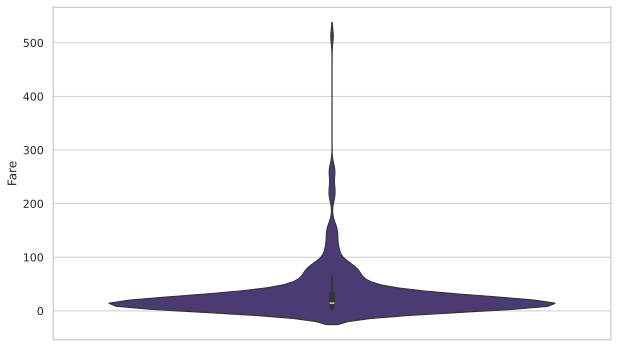

In [33]:
sns.set_theme(style='whitegrid',palette='viridis')
sns.violinplot(y='Fare', data=data)
plt.show()

可以发现低价船票占了绝大部分，因此尝试做一个对数变换

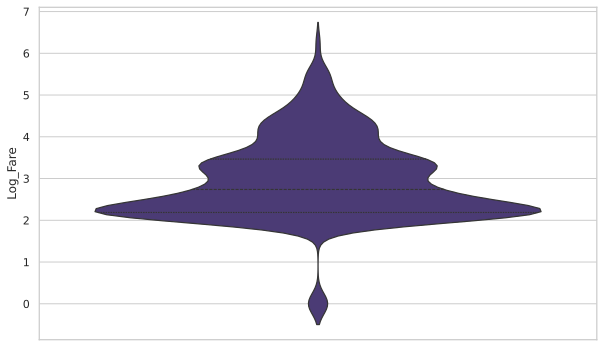

In [34]:
log_fare = np.log(data['Fare']+1)
data['Log_Fare'] = log_fare
sns.violinplot(y='Log_Fare', data=data,inner='quartile')
plt.show()

### 3.2生还者和遇难者的票价分布

遇难者票价：
 count    549.000000
mean      22.117887
std       31.388207
min        0.000000
25%        7.854200
50%       10.500000
75%       26.000000
max      263.000000
Name: Fare, dtype: float64 
生还者票价：
 count    342.000000
mean      48.395408
std       66.596998
min        0.000000
25%       12.475000
50%       26.000000
75%       57.000000
max      512.329200
Name: Fare, dtype: float64


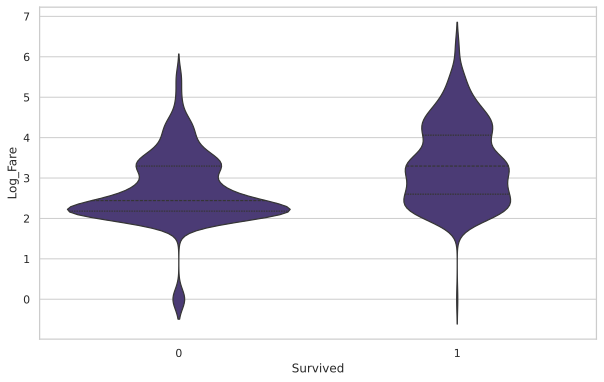

In [35]:
sns.violinplot(x='Survived',y='Log_Fare', data=data,inner='quartile',order=[0,1])
print("遇难者票价：\n",data[data['Survived']==0]['Fare'].describe(),'\n'
      "生还者票价：\n",data[data['Survived']==1]['Fare'].describe())
plt.show()

我们发现有一部分票价为0的人，写出来看看

In [36]:
free_ticket=data[data['Fare']==0][['Name','Age','Sex','Pclass','Survived','Cabin','Embarked']]
print("免费票人数为",len(free_ticket),'\n')
free_ticket.head(15)


免费票人数为 15 



,Name,Age,Sex,Pclass,Survived,Cabin,Embarked
179,"Leonard, Mr. Lionel",36.0,male,3,0,NaN,S
263,"Harrison, Mr. William",40.0,male,1,0,B94,S
271,"Tornquist, Mr. William Henry",25.0,male,3,1,NaN,S
277,"Parkes, Mr. Francis ""Frank""",NaN,male,2,0,NaN,S
302,"Johnson, Mr. William Cahoone Jr",19.0,male,3,0,NaN,S
413,"Cunningham, Mr. Alfred Fleming",NaN,male,2,0,NaN,S
466,"Campbell, Mr. William",NaN,male,2,0,NaN,S
481,"Frost, Mr. Anthony Wood ""Archie""",NaN,male,2,0,NaN,S
597,"Johnson, Mr. Alfred",49.0,male,3,0,NaN,S
633,"Parr, Mr. William Henry Marsh",NaN,male,1,0,NaN,S


他们无一例外都是从s港口登船的，全部都是男性，没有一起登船的人，且仅有一人存活。因此这一系列特征组合基本判了一个人死刑。

可以发现，存活组的每一个四分位数都显著高于遇难组。这说明票价高意味着更高的存活率。接下来我们从价格区间存活率方面来说明这个结论

In [37]:
print(data[data['Fare'].isna()==1])#价格部分没有缺失值


Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, Log_Fare]
Index: []


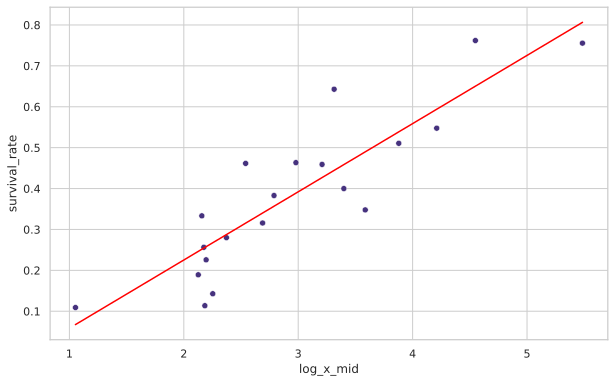

线性回归模型系数： 0.16674862274336807 截距： -0.10813591592112004 R^2= 0.777754058553328


In [38]:
data['fare_bin']=pd.qcut(data['Log_Fare'],q=20)
data['count_for_each_bin']=data.groupby('fare_bin',observed=False)['fare_bin'].transform('count')#计算每个票价区间的人数
data['survived_for_each_bin']=data.groupby('fare_bin',observed=False)['Survived'].transform('sum')#计算每个票价区间的存活人数
data['survival_rate']=data['survived_for_each_bin']/data['count_for_each_bin']
fare_survival_rate=data[['fare_bin','survival_rate']].drop_duplicates().sort_values(by='fare_bin')#每个票价区间的存活率，去重并排序
fare_survival_rate['log_x_mid']=fare_survival_rate['fare_bin'].apply(lambda x: x.mid)#计算票价区间的中点值
sns.scatterplot(x='log_x_mid',y='survival_rate',data=fare_survival_rate)#在图中我们可以发现，票价越高，存活率越高，做一个线性回归拟合
from sklearn.metrics import r2_score
model=LinearRegression()
X=fare_survival_rate['log_x_mid'].values.reshape(-1,1)
y=fare_survival_rate['survival_rate'].values
model.fit(X,y)
y_pred=model.predict(X)
plt.plot(fare_survival_rate['log_x_mid'],y_pred,color='red')
plt.show()
print("线性回归模型系数：",model.coef_[0],"截距：",model.intercept_,'R^2=',r2_score(y,model.predict(X)))


我忽略了可能存在的“团购票”，现在来修复这部分问题

0
24


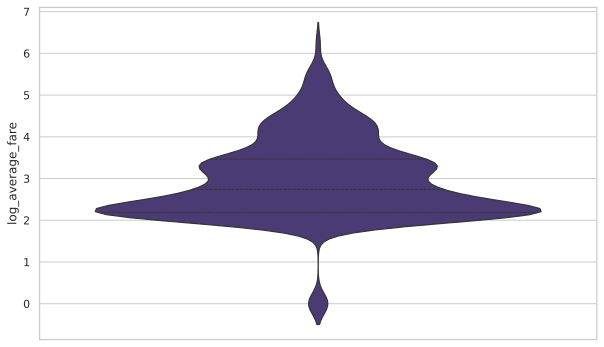

In [39]:
print(len(data[data['Ticket'].isna()==1]))#票号部分是否有缺失值
data['average_fare']=data.groupby('Ticket',observed=False)['Fare'].transform('mean')#计算每个票号的平均票价
print(len(data[data['average_fare']!=data['Fare']]))#有多少团购票？
data['log_average_fare']=np.log(data['average_fare']+1)  
sns.violinplot(y='log_average_fare', data=data,inner='quartile')
plt.show()                     

重新对票价区间的生存率分布绘制

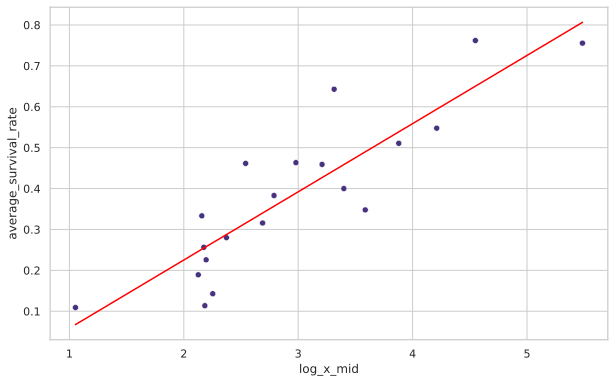

线性回归模型系数： 0.16674862274336807 截距： -0.10813591592112004 R^2= 0.777754058553328


In [40]:
data['average_fare_bin']=pd.qcut(data['log_average_fare'],q=20)
data['count_for_each_average_bin']=data.groupby('average_fare_bin',observed=False)['average_fare_bin'].transform('count')#计算每个票价区间的人数
data['survived_for_each_average_bin']=data.groupby('average_fare_bin',observed=False)['Survived'].transform('sum')#计算每个票价区间的存活人数
data['average_survival_rate']=data['survived_for_each_average_bin']/data['count_for_each_average_bin']
average_fare_survival_rate=data[['average_fare_bin','average_survival_rate']].drop_duplicates().sort_values(by='average_fare_bin')#每个票价区间的存活率，去重并排序
average_fare_survival_rate['log_x_mid']=average_fare_survival_rate['average_fare_bin'].apply(lambda x: x.mid)#计算票价区间的中点值
sns.scatterplot(x='log_x_mid',y='average_survival_rate',data=average_fare_survival_rate)#在图中我们可以发现，票价越高，存活率越高，做一个线性回归拟合
from sklearn.metrics import r2_score
model=LinearRegression()
X=average_fare_survival_rate['log_x_mid'].values.reshape(-1,1)
y=average_fare_survival_rate['average_survival_rate'].values
model.fit(X,y)
y_pred=model.predict(X)
plt.plot(average_fare_survival_rate['log_x_mid'],y_pred,color='red')    
plt.show()
print("线性回归模型系数：",model.coef_[0],"截距：",model.intercept_,'R^2=',r2_score(y,model.predict(X)))

事实上并没有太大区别，也只有24人是所谓团购票。但直觉上人均价格是比票价更好的特征。在训练模型时可以选用人均价格代替票价

小结：我们发现票价呈现了集中在低价，少部分高价的特点，且生还率随票价上升而上升，生存率关于票价对数有强相关性。此外还发现了免费票几乎无人生还。

## 4、从年龄分析

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

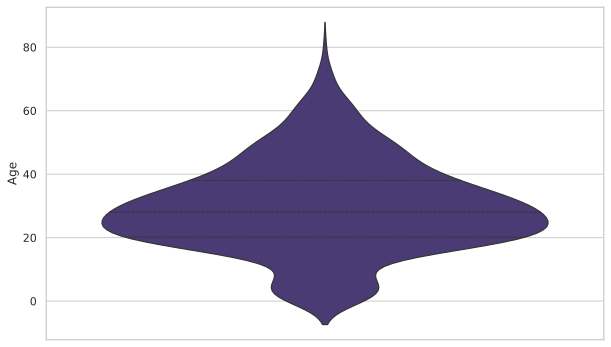

In [41]:
sns.violinplot(y='Age', data=data,inner='quartile')
data['Age'].describe()

年龄集中在20-40岁之间，占据了总人数接近50%

177 人年龄缺失，占比 0.19865319865319866


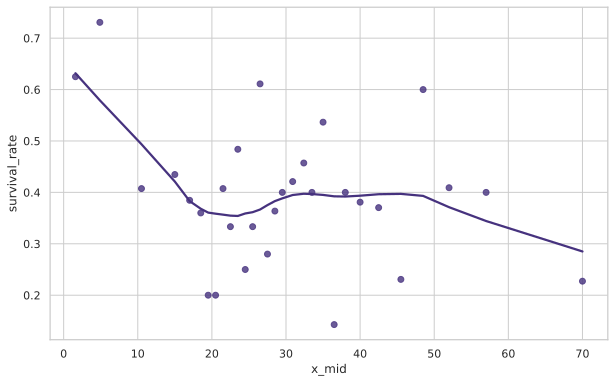

In [ ]:
print(len(data[data['Age'].isna()==1]),"人年龄缺失，占比",len(data[data['Age'].isna()==1])/len(data))
age_data=data[['Age','Survived','Sex']].dropna()#去除年龄缺失的数据
age_data['age_bin']=pd.qcut(age_data['Age'],q=30)
age_data['count_for_each_bin']=age_data.groupby('age_bin',observed=False)['Age'].transform('count')#计算每个年龄区间的人数
age_data['survived_for_each_bin']=age_data.groupby('age_bin',observed=False)['Survived'].transform('sum')#计算每个年龄区间的存活人数
age_data['survival_rate']=age_data['survived_for_each_bin']/age_data['count_for_each_bin']
age_survival_rate=age_data[['age_bin','survival_rate']].drop_duplicates().sort_values(by='age_bin')#每个年龄区间的存活率，去重并排序
age_survival_rate['x_mid']=age_survival_rate['age_bin'].apply(lambda x: x.mid)#计算年龄区间的中点值 
sns.regplot(x='x_mid',y='survival_rate',data=age_survival_rate,lowess=True)
plt.show()

结论：单从年龄来看，存活率几乎与之毫无联系，不能单作为特征。

### 4(附加)、年龄与性别交互特征生存率

我们用小提琴图描述两者关系

<Axes: xlabel='Sex', ylabel='Age'>

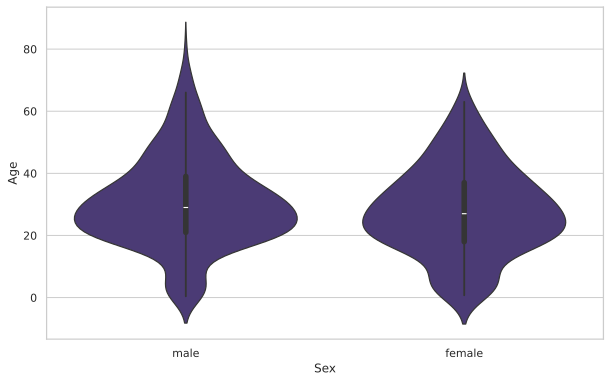

In [43]:
sns.violinplot(x='Sex',y='Age',data=age_data)

女性年龄-生存率曲线

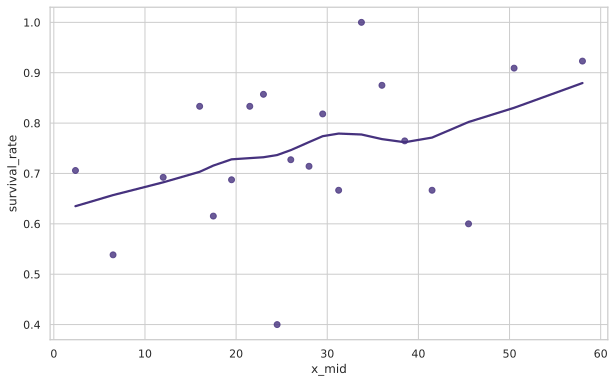

In [73]:
female_age_survial=data[data['Sex']=='female'][['Age','Survived']]
female_age_survial['age_bin']=pd.qcut(female_age_survial['Age'],q=20)
female_age_survial['count_for_each_bin']=female_age_survial.groupby('age_bin',observed=False)['Age'].transform('count')#计算每个年龄区间的人数
female_age_survial['survived_for_each_bin']=female_age_survial.groupby('age_bin',observed=False)['Survived'].transform('sum')#计算每个年龄区间的存活人数
female_age_survial['survival_rate']=female_age_survial['survived_for_each_bin']/female_age_survial['count_for_each_bin']
female_data=female_age_survial[['age_bin','survival_rate']].drop_duplicates().sort_values(by='age_bin')#每个年龄区间的存活率，去重并排序
female_data['x_mid']=female_data['age_bin'].apply(lambda x: x.mid)#计算年龄区间的中点值
sns.regplot(x='x_mid',y='survival_rate',data=female_data,lowess=True)
plt.show()

## 5、由免费票引出的思考

引言：在3.2中我们发现了一些悲剧：那些免费票使用者几乎无一生还。此外，他们还在一些特征中表现出惊人的一致性。本章就来探索这些特征

### 5.1、配偶近亲、直系亲属人数与存活率的关系(SibSp、Parch)

In [59]:
print(data['SibSp'].describe(),'\n',
data['Parch'].describe())

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64 
 count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64


可以发现大部分人没有熟人，尤其是父母孩子。配偶和近亲相对多些。不妨看看团体人数与存活率的关系

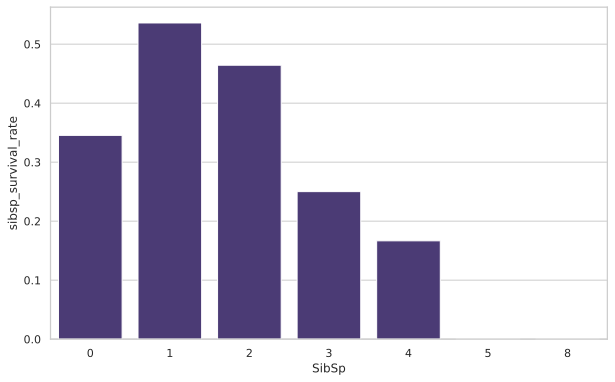

In [60]:
data['sibsp_count']=data.groupby(data['SibSp'])['SibSp'].transform('count')
data['sibsp_survived']=data.groupby('SibSp')['Survived'].transform('sum')
data['sibsp_survival_rate']=data['sibsp_survived']/data['sibsp_count']
sibsp_survival_rate=data[['SibSp','sibsp_survival_rate']].drop_duplicates().sort_values(by='SibSp')
sns.barplot(x='SibSp',y='sibsp_survival_rate',data=sibsp_survival_rate)
plt.show()

In [61]:
data['SibSp_fare']=data.groupby('SibSp')['Fare'].transform('mean')
SibSp_fare=data[['SibSp','SibSp_fare']].drop_duplicates().sort_values(by='SibSp')
print(SibSp_fare) 

     SibSp  SibSp_fare
2        0   25.692028
0        1   44.147370
38       2   51.753718
7        3   68.908862
16       4   31.855556
59       5   46.900000
159      8   69.550000


结论：和SibSp有一定关系，其中数量为一（可以猜测这是ta的配偶）存活率最高，结合前面女性存活率较高的结论，可以猜测男士倾向于将活下去的机会让给配偶。然后随亲属增加，存活率开始降低。可以作为特征

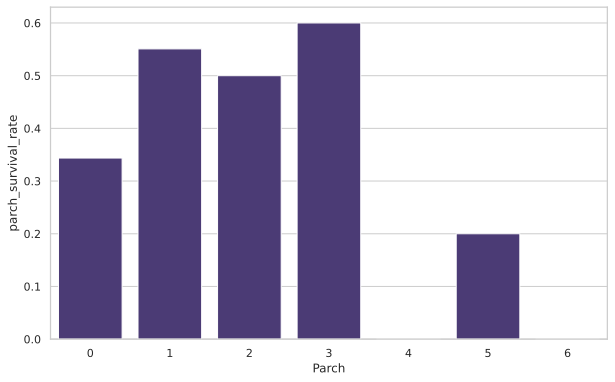

In [62]:
data['parch_count']=data.groupby(data['Parch'])['Parch'].transform('count')
data['parch_survived']=data.groupby('Parch')['Survived'].transform('sum')
data['parch_survival_rate']=data['parch_survived']/data['parch_count']
parch_survival_rate=data[['Parch','parch_survival_rate']].drop_duplicates().sort_values(by='Parch')
sns.barplot(x='Parch',y='parch_survival_rate',data=parch_survival_rate)
plt.show()

In [63]:
data['Parch_fare']=data.groupby('Parch')['Fare'].transform('mean')
Parch_fare=data[['Parch','Parch_fare']].drop_duplicates().sort_values(by='Parch')
print(Parch_fare)

     Parch  Parch_fare
0        0   25.586774
7        1   46.778180
8        2   64.337604
86       3   25.951660
167      4   84.968750
13       5   32.550000
678      6   46.900000


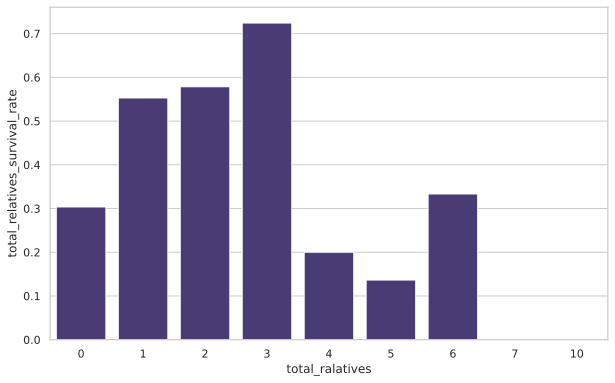

In [64]:
data['total_ralatives']=data['SibSp']+data['Parch']#创建一个新向量来表征一个人的所在团体人数
data['total_relatives_count']=data.groupby('total_ralatives')['total_ralatives'].transform('count')
data['total_relatives_survived']=data.groupby('total_ralatives')['Survived'].transform('sum')
data['total_relatives_survival_rate']=data['total_relatives_survived']/data['total_relatives_count']
total_relatives_survival_rate=data[['total_ralatives','total_relatives_survival_rate']].drop_duplicates().sort_values(by='total_ralatives')
sns.barplot(x='total_ralatives',y='total_relatives_survival_rate',data=total_relatives_survival_rate)
plt.show()

结论：我们可以发现，小团体往往有比单人和大团体更高的生存率，这或许是因为团体人数过多不易照顾彼此，而团体人数为2-3人的更容易互相帮助所致。这是重要的特征

### 5.3、cabin与存活率分析

我们发现，免费票提供的舱位（从未缺失的来看）都在A仓与B仓，这或许是几乎无人生还的原因之一。

In [65]:
cabin_data=data[data['Cabin'].isna()==0].copy()
cabin_data[['Name','Age','Sex','Pclass','Survived','Cabin','Embarked']].head(15)

,Name,Age,Sex,Pclass,Survived,Cabin,Embarked
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female,1,1,C85,C
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,female,1,1,C123,S
6,"McCarthy, Mr. Timothy J",54.0,male,1,0,E46,S
10,"Sandstrom, Miss. Marguerite Rut",4.0,female,3,1,G6,S
11,"Bonnell, Miss. Elizabeth",58.0,female,1,1,C103,S
21,"Beesley, Mr. Lawrence",34.0,male,2,1,D56,S
23,"Sloper, Mr. William Thompson",28.0,male,1,1,A6,S
27,"Fortune, Mr. Charles Alexander",19.0,male,1,0,C23 C25 C27,S
31,"Spencer, Mrs. William Augustus (Marie Eugenie)",NaN,female,1,1,B78,C
52,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",49.0,female,1,1,D33,C


分析仓分区和生还率的关系

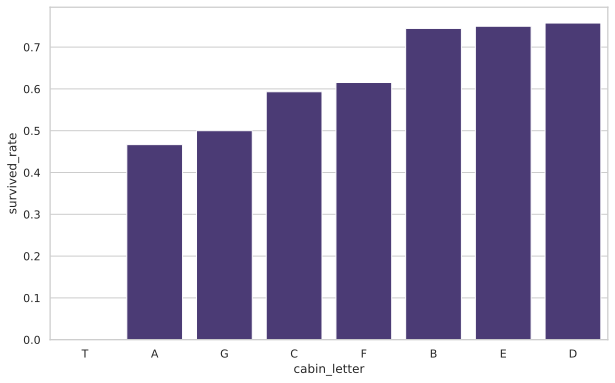

In [66]:
cabin_data['cabin_letter']=cabin_data['Cabin'].str[0]#提取仓分区字母
cabin_data['survived_rate']=cabin_data.groupby('cabin_letter')['Survived'].transform('sum')/cabin_data.groupby('cabin_letter')['Survived'].transform('count')
cabin_survival_rate=cabin_data[['cabin_letter','survived_rate']].drop_duplicates().sort_values(by='survived_rate')
sns.barplot(x='cabin_letter',y='survived_rate',data=cabin_survival_rate)
plt.show()

我们发现所有有舱位记录的票组成的数据集中，几乎每个舱的平均生存率都显著高于整体平均生存率（38.38%）！这说明”是否有舱位记录“本身就是重要特征，它可能反映了乘船者的身份，显然身份越高越有机会获救。分析生存率最高的B,D,E舱和最低的T舱

In [67]:
low_rate=cabin_data[cabin_data['cabin_letter']=='T']
low_rate[['Name','Age','Sex','Pclass','Survived','Cabin','Embarked']].head(15)

,Name,Age,Sex,Pclass,Survived,Cabin,Embarked
339,"Blackwell, Mr. Stephen Weart",45.0,male,1,0,T,S


偶然数据，无意义

In [68]:
high_rate=cabin_data[cabin_data['cabin_letter'].isin(['B','D','E'])]
print('人数:',len(high_rate),'\n')
print('一等票比例：',len(high_rate[high_rate['Pclass']==1])/len(high_rate),'\n')
high_rate.head(15)

人数: 112 

一等票比例： 0.9017857142857143 



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,parch_count,parch_survived,parch_survival_rate,Parch_fare,total_ralatives,total_relatives_count,total_relatives_survived,total_relatives_survival_rate,cabin_letter,survived_rate
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,678,233,0.343658,25.586774,0,537,163,0.303538,E,0.750000
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,...,678,233,0.343658,25.586774,0,537,163,0.303538,D,0.757576
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,...,678,233,0.343658,25.586774,1,161,89,0.552795,B,0.744681
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,...,678,233,0.343658,25.586774,1,161,89,0.552795,D,0.757576
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,...,118,65,0.550847,46.778180,1,161,89,0.552795,B,0.744681
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,...,678,233,0.343658,25.586774,0,537,163,0.303538,B,0.744681
92,93,0,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,W.E.P. 5734,61.1750,...,678,233,0.343658,25.586774,1,161,89,0.552795,E,0.750000
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,...,118,65,0.550847,46.778180,1,161,89,0.552795,D,0.757576
102,103,0,1,"White, Mr. Richard Frasar",male,21.0,0,1,35281,77.2875,...,118,65,0.550847,46.778180,1,161,89,0.552795,D,0.757576
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,...,118,65,0.550847,46.778180,1,161,89,0.552795,B,0.744681


我们还发现了重要特征：B,D,E舱几乎都是一等票。我们会在下章分析这个特征是如何与其他特征交互的